In [93]:
import requests
import json
from DbConn import *
from datetime import datetime, timedelta

def week_dataframe(day):
    db = DbConn()
    
    select_query = """
    select moviecd, audicnt 
    from boxoffice2  
    where  opendt +:day = dailydate and dailydate < TO_DATE('19/01/01', 'YY/mm/dd') and dailydate > TO_DATE('03/01/01', 'YY/mm/dd')  
    order by moviecd
    """
    params = {"day":day}
    select_result = db.execute(select_query,params)

    print("첫주 작업 완료. -----")
    db.disconnect()
    return  select_result

day = 1

def movie2_dataframe():
    db = DbConn()
    
    select_query = """
    select moviecd,  max_audiacc, 
    prod_max, director_avg, 
    director_max,  actors1_max,
    actors2_max, actors3_max,
    actors4_max,
    director_100cnt, prod_avg
    
    from movie2
    where opendt < TO_DATE('19/01/01', 'YY/mm/dd') and opendt > TO_DATE('03/01/01', 'YY/mm/dd') and max_audiacc > 1000000
    order by moviecd
    """
    select_result = db.execute(select_query)

    print("누적 작업 완료. -----")
    db.disconnect()
    return  select_result


def screen_dataframe():
    db = DbConn()
    
    select_query = """
    select moviecd, scrncnt
    
    from boxoffice2
    where dailydate = opendt
    order by moviecd
    """
    select_result = db.execute(select_query)

    print("누적 작업 완료. -----")
    db.disconnect()
    return  select_result

# def max_dataframe():
#     db = DbConn()
    
#     select_query = """
#     select moviecd,  max(audiacc)
#     from boxoffice 
#     group by moviecd
#     order by moviecd
#     """
#     select_result = db.execute(select_query)

#     print("누적 작업 완료. -----")
#     db.disconnect()
#     return  select_result

# print(week_dataframe(13))

print(movie2_dataframe())


누적 작업 완료. -----
[(20030371, 2544096, 2544096, 1945830, 2544096, 2552870, 6165804, 2544096, 2544096, 3, 2544096), (20030410, 1717703, 3348591, 2549650, 4310577, 11287394, 6841937, 3732836, 6424662, 7, 1357181), (20040490, 1822588, 5395350, 1752186, 5395350, 2651870, 1964593, 1822588, None, 4, 3608969), (20040491, 1505539, 1505539, 1675181, 4589877, 4589877, 4589877, None, None, 2, 762706), (20040554, 1267028, 1267028, 960827, 1267028, 3116112, 1267028, 1267028, 4130782, 1, 682694), (20040555, 1996575, 5237119, 2155852, 2315128, 1996575, 4568697, 1996575, None, 2, 2504379), (20040566, 1637354, 7350496, 580873, 1637354, 9945756, 2823007, 2218957, None, 1, 2256756), (20040568, 1293727, 1704670, 507661, 1293727, 12976528, 3116112, 3897475, 1293727, 2, 842298), (20040576, 1270315, 4008175, 994494, 3782251, 9686269, 1270315, 1534834, 1270315, 2, 1042621), (20040596, 1440092, 1440092, 776497, 1440092, 1440092, 1440092, 1440092, 2531834, 2, 1369417), (20040597, 1098865, 13326826, 1019706, 10988

In [94]:
import pandas as pd
df_week= []
for i in range(0,day):
    df_week_column_name = ['mnumber', 'dpeople+'+str(i)]
    df_week.append( pd.DataFrame(week_dataframe(i), columns=df_week_column_name) )



첫주 작업 완료. -----


In [95]:
movie2_dataframe
df_movie2_column_name = ['mnumber', 'sum_total_people','prod_max','director_avg','director_max',
                         'actors1_max', 'actors2_max', 'actors3_max', 'actors4_max',
                         'director_100cnt','prod_avg']
df_movie2 = pd.DataFrame(movie2_dataframe(), columns=df_movie2_column_name )
df_movie2.tail()

누적 작업 완료. -----


,mnumber,sum_total_people,prod_max,director_avg,director_max,actors1_max,actors2_max,actors3_max,actors4_max,director_100cnt,prod_avg
657,20185485,9945756,NaN,3602177,9945756,9945756.0,9945756.0,9945756.0,9945756.0,5,NaN
658,20186202,12264813,14401147.0,7056767,14401147,14401147.0,14401147.0,14401147.0,12264813.0,5,7769992.0
659,20186281,1558872,NaN,787563,1558872,3404477.0,1558872.0,1558872.0,1558872.0,1,NaN
660,20189262,1009427,NaN,1009427,1009427,1009427.0,1009427.0,1009427.0,1009427.0,1,NaN
661,20189783,1124639,1124639.0,1124639,1124639,12264813.0,2352497.0,1867444.0,1124639.0,1,1124639.0


In [96]:
screen_dataframe
df_screen_column_name = ['mnumber', 'screen']
df_screen = pd.DataFrame(screen_dataframe(), columns=df_screen_column_name )
df_screen.tail()

누적 작업 완료. -----


,mnumber,screen
3191,20209408,111
3192,20209463,409
3193,20209644,221
3194,20209882,322
3195,20209961,81


In [97]:
df = df_movie2
df.tail()

,mnumber,sum_total_people,prod_max,director_avg,director_max,actors1_max,actors2_max,actors3_max,actors4_max,director_100cnt,prod_avg
657,20185485,9945756,NaN,3602177,9945756,9945756.0,9945756.0,9945756.0,9945756.0,5,NaN
658,20186202,12264813,14401147.0,7056767,14401147,14401147.0,14401147.0,14401147.0,12264813.0,5,7769992.0
659,20186281,1558872,NaN,787563,1558872,3404477.0,1558872.0,1558872.0,1558872.0,1,NaN
660,20189262,1009427,NaN,1009427,1009427,1009427.0,1009427.0,1009427.0,1009427.0,1,NaN
661,20189783,1124639,1124639.0,1124639,1124639,12264813.0,2352497.0,1867444.0,1124639.0,1,1124639.0


In [98]:
# df = pd.merge(df_week[0],df_movie2, on='mnumber')

# for i in range(1,day) :
#     df = pd.merge(df_week[i],df, on='mnumber', how='outer')

# df.tail()

In [99]:
df = pd.merge(df,df_screen, on='mnumber')

df.tail()

,mnumber,sum_total_people,prod_max,director_avg,director_max,actors1_max,actors2_max,actors3_max,actors4_max,director_100cnt,prod_avg,screen
655,20185485,9945756,NaN,3602177,9945756,9945756.0,9945756.0,9945756.0,9945756.0,5,NaN,811
656,20186202,12264813,14401147.0,7056767,14401147,14401147.0,14401147.0,14401147.0,12264813.0,5,7769992.0,1967
657,20186281,1558872,NaN,787563,1558872,3404477.0,1558872.0,1558872.0,1558872.0,1,NaN,1016
658,20189262,1009427,NaN,1009427,1009427,1009427.0,1009427.0,1009427.0,1009427.0,1,NaN,682
659,20189783,1124639,1124639.0,1124639,1124639,12264813.0,2352497.0,1867444.0,1124639.0,1,1124639.0,795


In [100]:
df_movie2_column_name = ['mnumber', 'sum_total_people','prod_max','director_avg','director_max',
                         'actors1_max', 'actors2_max', 'actors3_max', 'actors4_max',
                         'director_100cnt','prod_avg']
for i in df_movie2_column_name:
    df[i] = df[i].fillna(0)
    
df.tail()

,mnumber,sum_total_people,prod_max,director_avg,director_max,actors1_max,actors2_max,actors3_max,actors4_max,director_100cnt,prod_avg,screen
655,20185485,9945756,0.0,3602177,9945756,9945756.0,9945756.0,9945756.0,9945756.0,5,0.0,811
656,20186202,12264813,14401147.0,7056767,14401147,14401147.0,14401147.0,14401147.0,12264813.0,5,7769992.0,1967
657,20186281,1558872,0.0,787563,1558872,3404477.0,1558872.0,1558872.0,1558872.0,1,0.0,1016
658,20189262,1009427,0.0,1009427,1009427,1009427.0,1009427.0,1009427.0,1009427.0,1,0.0,682
659,20189783,1124639,1124639.0,1124639,1124639,12264813.0,2352497.0,1867444.0,1124639.0,1,1124639.0,795


In [101]:
# for i in range(0,day) :
#     df['dpeople+'+str(i)] = df['dpeople+'+str(i)].fillna(0)

# df.tail()

In [102]:
print(df['sum_total_people'].quantile(q=0.9, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0.8, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0.7, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0.6, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0.5, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0.4, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0.3, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0.2, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0.1, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0, interpolation='nearest')
      
     )

a=df['sum_total_people'].quantile(q=0.9, interpolation='nearest')
b=df['sum_total_people'].quantile(q=0.8, interpolation='nearest')
c=df['sum_total_people'].quantile(q=0.7, interpolation='nearest')
d=df['sum_total_people'].quantile(q=0.6, interpolation='nearest')
e=df['sum_total_people'].quantile(q=0.5, interpolation='nearest')
f=df['sum_total_people'].quantile(q=0.4, interpolation='nearest')
g=df['sum_total_people'].quantile(q=0.3, interpolation='nearest')
h=df['sum_total_people'].quantile(q=0.2, interpolation='nearest')
i=df['sum_total_people'].quantile(q=0.1, interpolation='nearest')
j=df['sum_total_people'].quantile(q=0, interpolation='nearest')


a = 10000000
b = 5000000
c = 2000000
d = 1000000



# 1% 1000만
# 4% 500만
# 24% 100만
# 65% 13만
# 100% 0

5858224 4130782 3028504 2578194 2127080 1789829 1558872 1330940 1154416 1001207


In [103]:
score_list = []
for q in df['sum_total_people']:
    if q >= a:
        score_list.append('A')
    elif q >= b:
        score_list.append('B')
    elif q >= c:
        score_list.append('C')
    elif q >= d:
        score_list.append('D')
#     elif q >= e:
#         score_list.append('E')
#     elif q >= f:
#         score_list.append('F')
#     elif q >= g:
#         score_list.append('G')
#     elif q >= h:
#         score_list.append('H')
#     elif q >= i:
#         score_list.append('I')
#     else:
#         score_list.append('J')
   

df['score'] = score_list
df['score'].head()

0    C
1    D
2    D
3    D
4    D
Name: score, dtype: object

In [104]:
df.groupby('score')['score'].count()

score
A     20
B     76
C    257
D    307
Name: score, dtype: int64

In [105]:
X = df.drop(['mnumber', 'sum_total_people','score'], axis=1)
X.tail()

,prod_max,director_avg,director_max,actors1_max,actors2_max,actors3_max,actors4_max,director_100cnt,prod_avg,screen
655,0.0,3602177,9945756,9945756.0,9945756.0,9945756.0,9945756.0,5,0.0,811
656,14401147.0,7056767,14401147,14401147.0,14401147.0,14401147.0,12264813.0,5,7769992.0,1967
657,0.0,787563,1558872,3404477.0,1558872.0,1558872.0,1558872.0,1,0.0,1016
658,0.0,1009427,1009427,1009427.0,1009427.0,1009427.0,1009427.0,1,0.0,682
659,1124639.0,1124639,1124639,12264813.0,2352497.0,1867444.0,1124639.0,1,1124639.0,795


In [106]:
Y=df['score']

In [107]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# train, test 7:3
X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                   test_size=0.3, random_state=999)

In [108]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(max_depth=4, learning_rate=0.3,  random_state=999)
gbc.fit(X_train,y_train)
gbc.score(X_train,y_train),gbc.score(X_test,y_test)



(1.0, 0.9090909090909091)

In [109]:
from sklearn.model_selection import GridSearchCV

param = {
    'max_depth' : [3,4,5,6],
    'learning_rate' : [0.1,0.15, 0.2, 0.25, 0.3]
}

grid_cv_gbc = GridSearchCV(gbc, param_grid=param, cv=2, verbose=1, n_jobs=-1)
grid_cv_gbc.fit(X_train, y_train.values)
gbc_best = grid_cv_gbc.best_estimator_
print('최적 하이퍼 파라미터: \n', grid_cv_gbc.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv_gbc.best_score_))

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.9s finished


최적 하이퍼 파라미터: 
 {'max_depth': 3, 'learning_rate': 0.15}
최고 예측 정확도: 0.9177


In [110]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(n_estimators=30, 
                        random_state=10, 
                        learning_rate=0.2)
adb.fit(X_train,y_train)
adb.score(X_train,y_train),adb.score(X_test,y_test)

(0.6428571428571429, 0.601010101010101)

In [111]:
from sklearn.model_selection import GridSearchCV

param = {
    'n_estimators' : [10,20,30,40,50],
    'learning_rate' : [0.1,0.15, 0.2]
}

grid_cv_adb = GridSearchCV(adb, param_grid=param, cv=2, verbose=1, n_jobs=-1)
grid_cv_adb.fit(X_train, y_train.values)
adb_best = grid_cv_adb.best_estimator_
print('최적 하이퍼 파라미터: \n', grid_cv_adb.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv_adb.best_score_))

Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:    0.0s remaining:    0.0s


최적 하이퍼 파라미터: 
 {'n_estimators': 10, 'learning_rate': 0.1}
최고 예측 정확도: 0.7944


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.3s finished
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [112]:
rfc = RandomForestClassifier(n_estimators=70, random_state=999)
rfc.fit(X_train,y_train)
rfc.score(X_train,y_train), rfc.score(X_test,y_test)

(1.0, 0.8888888888888888)

In [113]:
from sklearn.model_selection import GridSearchCV

param = {
    'n_estimators' : [10,20,30,40,50,60,70,80,90,100]
}

grid_cv_rfc = GridSearchCV(rfc, param_grid=param, cv=2, verbose=1, n_jobs=-1)
grid_cv_rfc.fit(X_train, y_train.values)
rfc_best = grid_cv_rfc.best_estimator_
print('최적 하이퍼 파라미터: \n', grid_cv_rfc.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv_rfc.best_score_))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done   5 out of  20 | elapsed:    0.0s remaining:    0.3s


최적 하이퍼 파라미터: 
 {'n_estimators': 40}
최고 예측 정확도: 0.9156


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.5s finished


In [114]:
from sklearn.metrics import accuracy_score
# GridSearchCV를 이용해 최적으로 학습된 estimators로 예측 수행
gb_pred_gbc = grid_cv_gbc.best_estimator_.predict(X_test)
gb_accuracy_gbc = accuracy_score(y_test, gb_pred_gbc)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy_gbc))

gb_pred_adb = grid_cv_adb.best_estimator_.predict(X_test)
gb_accuracy_adb = accuracy_score(y_test, gb_pred_adb)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy_adb))

gb_pred_rfc = grid_cv_rfc.best_estimator_.predict(X_test)
gb_accuracy_rfc = accuracy_score(y_test, gb_pred_rfc)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy_rfc))

GBM 정확도: 0.9040
GBM 정확도: 0.7374
GBM 정확도: 0.8939


In [115]:
from sklearn.ensemble import VotingClassifier
votigC = VotingClassifier(estimators=[
    ('gbc',gbc_best),('adb',adb_best),('rfc',rfc_best)], voting='hard', n_jobs=3 )
votigC = votigC.fit(X_train,y_train) 
#예측진행
prediction = votigC.predict(X_test)

In [116]:
from sklearn.externals import joblib 
# 객체를 pickled binary file 형태로 저장한다 
file_name = '1000_500_200_100_voting_model.pkl' 
joblib.dump(votigC, file_name) 

['1000_500_200_100_voting_model.pkl']

In [117]:
from sklearn.externals import joblib 
# pickled binary file 형태로 저장된 객체를 로딩한다 
file_name = '1000_500_200_100_voting_model.pkl' 
votigC = joblib.load(file_name) 

In [118]:
# cunfuse matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 보팅한 컨퓨전매트릭스
conMat = pd.DataFrame(confusion_matrix(y_test,prediction),
#                          index=['True[A]', 'True[B]', 'True[C]', 'True[D]',  'True[E]','True[F]', 'True[G]', 'True[H]', 'True[J]',  'True[K]'],
#                          columns=['Pred[A]', 'Pred[B]', 'Pred[C]', 'Pred[D]',  'Pred[E]','Pred[F]', 'Pred[G]', 'Pred[H]', 'Pred[J]',  'Pred[K]'])
                         index=['True[A]', 'True[B]', 'True[C]', 'True[D]'],
                         columns=['Pred[A]', 'Pred[B]', 'Pred[C]', 'Pred[D]'])

gb_accuracy_voting = accuracy_score(y_test, prediction)
print('초대박 :',a,'명')
print('대박 :',b,'명')
print('중박 :',c,'명')
print('쪽박 :',d,'명')
print('GBM 정확도: {0:.4f}'.format(gb_accuracy_voting))
 # 정확도, precision, recall, f1
conMat


초대박 : 10000000 명
대박 : 5000000 명
중박 : 2000000 명
쪽박 : 1000000 명
GBM 정확도: 0.9091


,Pred[A],Pred[B],Pred[C],Pred[D]
True[A],7,0,0,0
True[B],0,21,2,0
True[C],0,0,75,2
True[D],0,1,13,77


In [119]:
gb_accuracy_voting = accuracy_score(y_test, prediction)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy_voting))

GBM 정확도: 0.9091


In [120]:
# cunfuse matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
rfc.fit(X_train, y_train) #랜덤포레스트의 컨퓨전 매트릭스

y_pred = rfc.predict(X_test)

conMat = pd.DataFrame(confusion_matrix(y_test,y_pred),
#                         index=['True[A]', 'True[B]', 'True[C]', 'True[D]',  'True[E]','True[F]', 'True[G]', 'True[H]', 'True[J]',  'True[K]'],
#                          columns=['Pred[A]', 'Pred[B]', 'Pred[C]', 'Pred[D]',  'Pred[E]','Pred[F]', 'Pred[G]', 'Pred[H]', 'Pred[J]',  'Pred[K]'])
                         index=['True[A]', 'True[B]', 'True[C]', 'True[D]'],
                         columns=['Pred[A]', 'Pred[B]', 'Pred[C]', 'Pred[D]'])
 # 정확도, precision, recall, f1
conMat

,Pred[A],Pred[B],Pred[C],Pred[D]
True[A],7,0,0,0
True[B],1,20,1,1
True[C],0,1,72,4
True[D],0,1,13,77


In [121]:
gb_accuracy_rfc = accuracy_score(y_test, y_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy_rfc))

GBM 정확도: 0.8889


In [122]:
feat_labels = X.columns
feat_labels

Index(['prod_max', 'director_avg', 'director_max', 'actors1_max',
       'actors2_max', 'actors3_max', 'actors4_max', 'director_100cnt',
       'prod_avg', 'screen'],
      dtype='object')

 1) director_max                   0.323749
 2) actors4_max                    0.188672
 3) actors2_max                    0.128543
 4) actors3_max                    0.106874
 5) actors1_max                    0.063814
 6) director_avg                   0.054174
 7) prod_max                       0.053145
 8) screen                         0.037357
 9) prod_avg                       0.023813
10) director_100cnt                0.019858


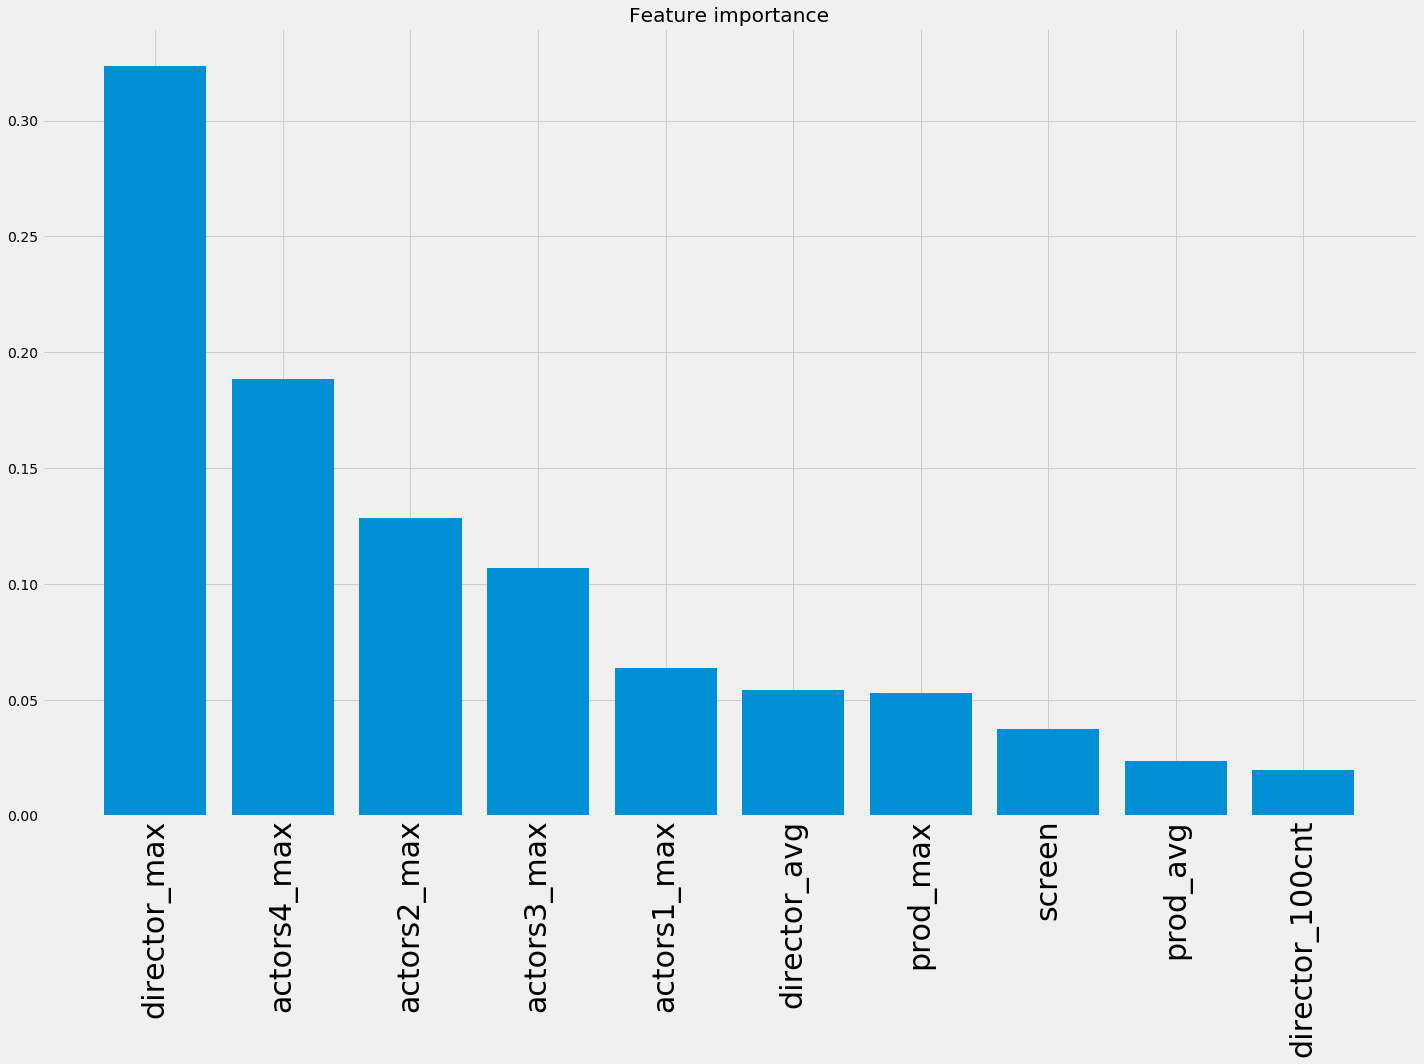

In [123]:
import numpy as np

plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(20,15))
                 
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f"%(f+1,30,feat_labels[indices[f]],
                         importances[indices[f]]))
plt.title('Feature importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90,fontsize=30)
plt.tight_layout()
plt.savefig('randomforest.png')
plt.show()

In [124]:
# 1~7 일 정도의 데이터가 제일 중요하고 이후날짜의 데이터는 크게 중요치 않음

In [86]:
df.head()

,mnumber,sum_total_people,prod_max,director_avg,director_max,actors1_max,actors2_max,actors3_max,actors4_max,director_100cnt,prod_avg,screen,score
0,20030371,2544096,2544096.0,1945830,2544096,2552870.0,6165804.0,2544096.0,2544096.0,3,2544096.0,74,C
1,20030410,1717703,3348591.0,2549650,4310577,11287394.0,6841937.0,3732836.0,6424662.0,7,1357181.0,15,D
2,20040490,1822588,5395350.0,1752186,5395350,2651870.0,1964593.0,1822588.0,0.0,4,3608969.0,127,D
3,20040491,1505539,1505539.0,1675181,4589877,4589877.0,4589877.0,0.0,0.0,2,762706.0,162,D
4,20040554,1267028,1267028.0,960827,1267028,3116112.0,1267028.0,1267028.0,4130782.0,1,682694.0,93,D


In [87]:
df.columns

Index(['mnumber', 'sum_total_people', 'prod_max', 'director_avg',
       'director_max', 'actors1_max', 'actors2_max', 'actors3_max',
       'actors4_max', 'director_100cnt', 'prod_avg', 'screen', 'score'],
      dtype='object')

In [88]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

# y, X = dmatrices('sum_total_people ~ mnumber+ actors1_max+ actors2_max+actors3_max+ actors4_max+ actors1_avg+ actors2_avg+actors3_avg+ actors4_avg+ actors1_100cnt+ actors2_100cnt+actors3_100cnt+ actors4_100cnt+ prod_max+ prod_avg+prod_100cnt+ genre_max+ genre_avg+ genre_100cnt+ genresub_max+genresub_avg+ genresub_100cnt+ director_max+ director_avg+director_100cnt+ screen' , df, return_type = 'dataframe')
y, X = dmatrices('sum_total_people ~ mnumber+ actors1_max+ actors2_max+actors3_max+ actors4_max+  prod_max+ director_max+ screen' , df, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,551960.523478,Intercept
1,2.347047,mnumber
2,1.415313,actors1_max
3,1.381079,actors2_max
4,1.504689,actors3_max
5,1.603363,actors4_max
6,1.411851,prod_max
7,1.553189,director_max
8,2.643410,screen
